In [44]:
# Importing my libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Brainstorming before and after exploratory analysis and determine the purpose of my research

Variables of interest: race, gender, age, weight and time in hospital and readmitted

I'm going to create a dataframe of the columns that I want which race, gender, age, time in hospital. (The purpose is to preserve as many rows with data and only remove na rows that involve these column)


I will create a Histogram to determine the distribution of the data and see if its skrewed.
I will create a boxplot to see if there many outliers


The purpose of the study is to see which race, gender, age groups have shorter or longer hospitals stays and how many of them are being readmitted. 


 


In [45]:
#Reading CSV
df = pd.read_csv('https://raw.githubusercontent.com/niteen11/DataAnalyticsAcademy/master/Python/dataset_diabetes/diabetic_data.csv')



# Exploratory 

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [36]:
#df.head(100)
#Problematic columns

df[['weight', 'payer_code']].head(100)

,weight,payer_code
0,?,?
1,?,?
2,?,?
3,?,?
4,?,?
...,...,...
95,?,?
96,?,?
97,?,?
98,?,?


In [37]:
df.tail()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO
101765,443867222,175429310,Caucasian,Male,[70-80),?,1,1,7,6,...,No,No,No,No,No,No,No,No,No,NO


df.groupby('weight').size()

.size(): This function returns the number of elements in each group, including the missing values (NaN). It counts all the elements, including nulls, within each group. So if a group has missing values, they will be included in the size count.

.count(): This function, on the other hand, returns the number of non-null elements in each group. It does not count missing values (NaN) within each group. It will only count the non-null values present in each group.

### My answer

I'm going to create a dataframe of the columns that I want which race, gender, age, time in hospital and readmitted. (The purpose is to preserve as many rows with data and only remove na rows that involve these column)

I will create another dataset which will include only weight, time in hosptal and readmitted. The reason is because the weight column has mostly "?" and when you remove it, it wil remove 90% of the data (which I consider to be a limitatation because I will lose many rows)

I will create a Histogram to determine the distribution of the data and see if its screw.
I will create a boxplot to see if there many outliers
I will create a scatterplot to determine the relationship (if its positive or negative)



In [171]:
#Reading CSV
df = pd.read_csv('https://raw.githubusercontent.com/niteen11/DataAnalyticsAcademy/master/Python/dataset_diabetes/diabetic_data.csv')

#create a dataframe of the columns that I want which race, gender, age, time in hospital and readmitted.
selected_columns = ['race', 'gender', 'age', 'time_in_hospital', 'readmitted']
df_sub = df[selected_columns]

# To view the first few rows of the new DataFrame
print(df_sub.head())

              race  gender      age  time_in_hospital readmitted
0        Caucasian  Female   [0-10)                 1         NO
1        Caucasian  Female  [10-20)                 3        >30
2  AfricanAmerican  Female  [20-30)                 2         NO
3        Caucasian    Male  [30-40)                 2         NO
4        Caucasian    Male  [40-50)                 1         NO


In [172]:
df_sub.dropna()

,race,gender,age,time_in_hospital,readmitted
0,Caucasian,Female,[0-10),1,NO
1,Caucasian,Female,[10-20),3,>30
2,AfricanAmerican,Female,[20-30),2,NO
3,Caucasian,Male,[30-40),2,NO
4,Caucasian,Male,[40-50),1,NO
...,...,...,...,...,...
101761,AfricanAmerican,Male,[70-80),3,>30
101762,AfricanAmerican,Female,[80-90),5,NO
101763,Caucasian,Male,[70-80),1,NO
101764,Caucasian,Female,[80-90),10,NO


In [145]:
df_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   race              101766 non-null  object
 1   gender            101766 non-null  object
 2   age               101766 non-null  object
 3   time_in_hospital  101766 non-null  int64 
 4   readmitted        101766 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.9+ MB


In [146]:
df_sub.head()

,race,gender,age,time_in_hospital,readmitted
0,Caucasian,Female,[0-10),1,NO
1,Caucasian,Female,[10-20),3,>30
2,AfricanAmerican,Female,[20-30),2,NO
3,Caucasian,Male,[30-40),2,NO
4,Caucasian,Male,[40-50),1,NO


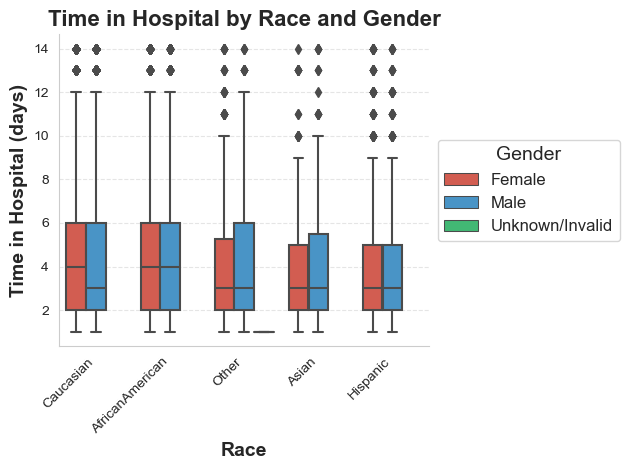

In [150]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter out rows with race as "?"
df_sub_filtered = df_sub[df_sub['race'] != "?"]

# Set a custom color palette
custom_palette = ['#E74C3C', '#3498DB', '#2ECC71', '#F1C40F', '#9B59B6', '#95A5A6']

# Set a custom font
custom_font = {'font.family': 'serif', 'font.serif': ['Times New Roman']}

# Apply the custom font and set the style
plt.rcParams.update(custom_font)
sns.set_style("whitegrid")

# Create the box plot with the custom palette and filtered data
sns.boxplot(x='race', y='time_in_hospital', hue='gender', data=df_sub_filtered, palette=custom_palette)

# Add labels and title with custom font size and weight
plt.xlabel('Race', fontsize=14, fontweight='bold')
plt.ylabel('Time in Hospital (days)', fontsize=14, fontweight='bold')
plt.title('Time in Hospital by Race and Gender', fontsize=16, fontweight='bold')

# Customize the grid and background
plt.grid(axis='y', linestyle='dashed', alpha=0.5)
plt.gca().set_axisbelow(True)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Customize the legend with custom font size and title, and move it to the right
plt.legend(title='Gender', fontsize=12, title_fontsize=14, loc='center left', bbox_to_anchor=(1, 0.5))

# Adjust x-axis labels spacing
plt.xticks(rotation=45, ha='right')  # Rotate labels and align them to the right
plt.subplots_adjust(bottom=0.15)  # Increase space for x-axis labels

# Adjust plot layout
plt.tight_layout()

# Display the plot
plt.show()






##NOTES
Reading a box plot is relatively straightforward and provides essential information about the distribution of a dataset. Box plots, also known as box-and-whisker plots, display five key summary statistics of a dataset:

Median (Q2 or 50th Percentile): The middle value of the dataset. Half of the data points fall below this value, and half fall above it. The median is represented by a horizontal line inside the box.

Interquartile Range (IQR): The range between the first quartile (Q1) and the third quartile (Q3). It contains the middle 50% of the data. The box in the box plot represents the IQR.

Quartiles (Q1 and Q3): The first quartile (Q1) is the 25th percentile, and the third quartile (Q3) is the 75th percentile. These quartiles define the boundaries of the box.

Whiskers: The lines extending from the box indicate the minimum and maximum values within 1.5 times the IQR. Data points beyond the whiskers are considered outliers and are plotted as individual points.

Outliers: Data points that fall outside the whiskers are plotted individually as outliers, represented by points beyond the whisker limits.

Here's a quick guide on how to read a box plot:

Central Tendency: The median is a measure of the central tendency, showing the middle value of the data.

Spread: The length of the box (IQR) shows the spread of the middle 50% of the data.

Skewness: If one whisker is longer than the other, the data may be skewed towards that side.

Outliers: Individual points beyond the whiskers are outliers, and they can be indications of data points that significantly differ from the rest of the dataset.

Comparison: Box plots are useful for comparing distributions between different groups, as shown by different boxes side by side.

By interpreting these components, you can gain insights into the data's distribution and identify potential outliers or differences between different groups. Box plots are valuable tools for exploratory data analysis and quickly visualizing the basic statistics of a dataset.

## MyAnswer

The box plot displays the time in the hospital for different races and genders. 
The median time in the hospital is highest for the causcasians and African americans (But I dont trust it since majority of the sample were causcasians and if this data was randomly sample the outcome could be different). 

The spread of the data, as represented by the interquartile range (IQR), is widest for causcasians and African americans and narrowest for hispanic and asian females. 

The data for all races appears to be positively skewed, as indicated by the longer 
whisker on the right side of the box. Additionally, there are  outliers in the dataset for all genders and races. Further investigation may be needed to understand the reasons behind these outliers. Overall, the box plot reveals 
differences in hospitalization time between races and provides valuable insights for further analysis.


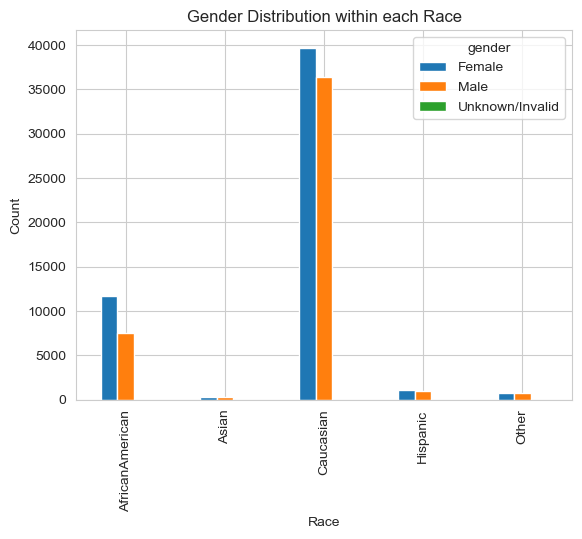

In [181]:
df_sub_filtered = df_sub[df_sub['race'] != "?"]
df_sub_filtered.dropna()
pd.crosstab(df_sub_filtered['race'], df_sub['gender']).plot(kind='bar')
plt.title('Gender Distribution within each Race')
plt.xlabel('Race')
plt.ylabel('Count')
plt.show()



Based on my experience, this is a common bad practice to have majority of the sample to be one race. It shows that there was no 
random sampling. Random sampling is important to reduce bias and also make inference to the general population. So its difficult 
to make conclusions for the generation population on diabetes. 

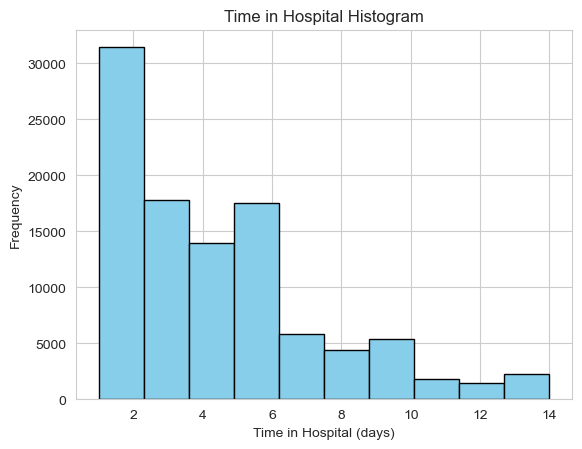

In [185]:
plt.hist(df_sub['time_in_hospital'], bins=10, color='skyblue', edgecolor='black')
plt.title('Time in Hospital Histogram')
plt.xlabel('Time in Hospital (days)')
plt.ylabel('Frequency')
plt.show()

The histogram is right skewed or right tail or positive skrewed. This occurs when you have more sample on the lower end of the
positive axis. Based on this history we can tell that majority of the people were in the hospital for maxiumum 2 days. It very
diificult to drawed any real conclusion as this histogram is not normally distributed.